In [595]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [504]:
df=pd.read_csv("Apps_data.csv")

In [505]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [413]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [506]:
df.shape

(10841, 13)

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Summary Statistics of the dataset

In [508]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [509]:
df.describe(include='O').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [510]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Presence of duplicate records

In [511]:
df.duplicated().sum()

483

In [512]:
df[df.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [513]:
df[df.duplicated()].sort_values(by=['App']).tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
282,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
558,"muzmatch: Muslim & Arab Singles, Marriage & Da...",DATING,3.8,5164,25M,"100,000+",Free,0,Mature 17+,Dating,"July 24, 2018",3.8.75a,4.0.3 and up
2367,mySugr: the blood sugar tracker made just for you,MEDICAL,4.6,21189,36M,"1,000,000+",Free,0,Everyone,Medical,"August 6, 2018",3.52.1,5.0 and up
1921,slither.io,GAME,4.4,5235294,Varies with device,"100,000,000+",Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


# Dropping duplicate records

In [514]:
df.drop_duplicates(inplace=True)

In [515]:
df.duplicated().sum()

0

# Checking the "Category" column.

In [516]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [517]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [518]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we could see ,the value 1.9 dosen't seem to convey or hold any meaning when viewing it from category perspective and comparing it with other category values.Hence ,the corresponding row will be dropped.

In [519]:
ind=df[df['Category']=='1.9'].index #Fetching the index of the corresponding row
ind

Int64Index([10472], dtype='int64')

In [520]:
df.drop(index=ind,inplace=True)    #Dropping the row

In [521]:
df['Category'].value_counts()      #Checking the rows 

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# Checking the column "Rating"

In [522]:
df['Rating'].value_counts(dropna=False)

NaN    1465
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [523]:
df['Rating'].isna().sum()       #Count of records whose rating value is NAN

1465

In [524]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [525]:
df[~df['Rating'].isna()].shape #Shape of the records whose rating value is not NAN

(8892, 13)

In [526]:
df.shape                       #Shape of the original dataset

(10357, 13)

In [527]:
df=df[~df['Rating'].isna()]                               
                                
df.shape

(8892, 13)

In [528]:
df['Rating'].value_counts(dropna=False)

4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [529]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# Creating new column "Rating_category"

In [530]:
df['Rating_category']=df['Rating'].map(lambda x:"high" if x>3.5 else "low")

In [531]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


In [532]:
df[['Rating','Rating_category']].value_counts()

Rating  Rating_category
4.4     high               1032
4.3     high               1016
4.5     high                977
4.2     high                888
4.6     high                768
4.1     high                657
4.0     high                539
4.7     high                484
3.9     high                372
3.8     high                293
5.0     high                271
3.7     high                231
4.8     high                228
3.6     high                169
3.5     low                 157
3.4     low                 127
3.3     low                 101
4.9     high                 87
3.0     low                  82
3.1     low                  69
3.2     low                  64
2.9     low                  45
2.8     low                  40
2.6     low                  24
2.7     low                  23
2.3     low                  20
2.5     low                  20
2.4     low                  19
1.0     low                  16
2.2     low                  14
2.0     low     

In [533]:
df[['Rating','Rating_category']].value_counts().sum()

8892

In [534]:
df.shape

(8892, 14)

# Distribution of the column "Rating_category"

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

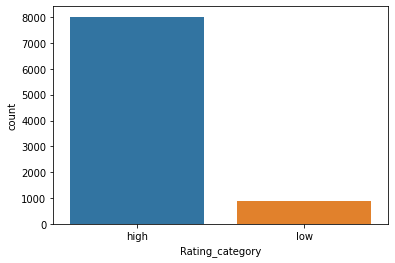

In [535]:
sns.countplot(data=df,x='Rating_category')

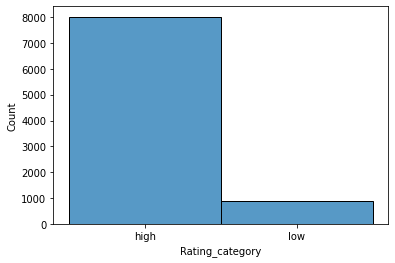

In [536]:
sns.histplot(data=df['Rating_category'])
plt.show()

In [537]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

As we could from the distribution of the column "Rating_category",we could see that most of the apps have rating above 3.5 and hence their rating is high and the count of high rated apps is 8012 and the remaining 880 are low rated apps.

# Checking the column "Reviews"

In [538]:
df['Reviews'].value_counts(dropna=False)

2          82
3          76
5          74
4          74
1          67
           ..
3157936     1
527247      1
240475      1
5282558     1
398307      1
Name: Reviews, Length: 5992, dtype: int64

In [539]:
df['Reviews'].isna().sum()

0

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   object 
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


In [541]:
df['Reviews']=df['Reviews'].astype('int64')

In [542]:
df.info()                                    #converting the column "Reviews" to numeric datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


<AxesSubplot:>

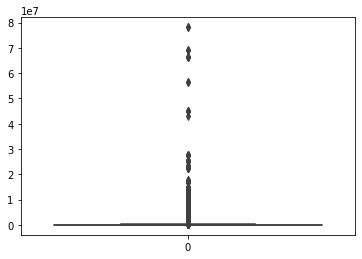

In [543]:
sns.boxplot(data=df['Reviews'])

In [544]:
df['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<AxesSubplot:>

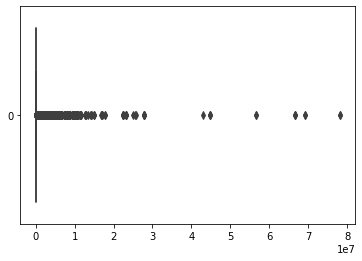

In [545]:
sns.boxplot(data=df['Reviews'],orient='h')

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

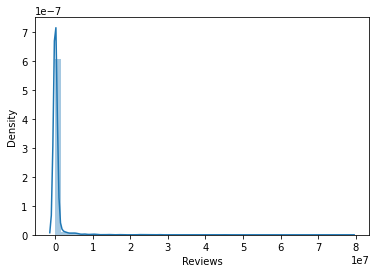

In [546]:
sns.distplot(df['Reviews'])

From the above observations ,we could see that the data based on the column "Reviews" has many outliers and the data is skewed towards right.Hence we need to transform the data using log transformation.

In [547]:
df['Reviews']=np.log(df['Reviews'])

In [548]:
df['Reviews'].value_counts()

0.693147     82
1.098612     76
1.609438     74
1.386294     74
0.000000     67
             ..
14.965429     1
13.175424     1
12.390371     1
15.479921     1
12.894978     1
Name: Reviews, Length: 5992, dtype: int64

<AxesSubplot:>

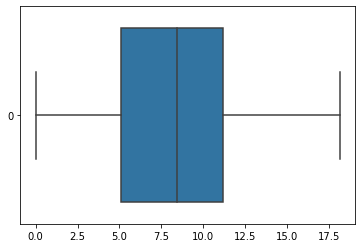

In [549]:
sns.boxplot(data=df['Reviews'],orient='h')

# Checking the column "Size"

In [550]:
df['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [551]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [552]:
df[df['Size']=='Varies with device'].shape

(1468, 14)

In [553]:
df.shape

(8892, 14)

In [554]:
df=df[df['Size']!='Varies with device']    #Dropping the records whose Size value is 'Varies with device'
df.shape

(7424, 14)

In [555]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [556]:
df['Size']=df['Size'].map(lambda x:float(x[:-1])*1000000 if x[-1]=='M' else float(x[:-1])*1000)  #converting the coulumn "Size" from non numeric to float datatype.

In [557]:
df['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06,
       9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 9.40e+06, 1.50e+07,
       1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07,
       5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05, 3.60e+06, 5.70e+06,
       8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06, 7.00e+06, 1.60e+07,
       3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07, 3.20e+07,
       5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06, 9.80e+06,
       5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06, 7.10e+06,
       2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06, 9.50e+06,
       5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06,
       4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06, 5.50e+07,
       2.30e+04, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e+06, 5.10e

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   object 
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), object(11)
memory usage: 870.0+ KB


# Checking the column 'Installs'

In [559]:
df['Installs'].value_counts(dropna=False)

1,000,000+        1230
100,000+          1003
10,000+            949
10,000,000+        762
1,000+             675
5,000,000+         493
500,000+           471
50,000+            432
5,000+             414
100+               297
500+               195
100,000,000+       192
50,000,000+        144
10+                 67
50+                 56
500,000,000+        24
5+                   9
1,000,000,000+       8
1+                   3
Name: Installs, dtype: int64

In [560]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [561]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [562]:
df['Installs']=df['Installs'].map(lambda x:x.strip("+").strip(" ").replace(",","")).astype("int64")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int64  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 870.0+ KB


# Checking the column "Price"

In [563]:
df['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [564]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [565]:
df['Price']=df['Price'].map(lambda x:float(x[1:]) if x[0]=='$' else float(x))
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int64  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   float64
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 870.0+ KB


# Dropping the unnecessary columns 

In [567]:
df.drop(['App','Rating','Genres','Last Updated','Current Ver'],axis=1,inplace=True)

In [568]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,4.0.3 and up,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,4.0.3 and up,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,4.0.3 and up,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,4.2 and up,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,4.4 and up,high
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,2.2 and up,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,4.1 and up,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,4.1 and up,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,4.1 and up,high


In [569]:
df.drop('Android Ver',axis=1,inplace=True)

In [570]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,high


# Encoding categorical variables

In [571]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [572]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [573]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [574]:
df['Rating_category'].unique()

array(['high', 'low'], dtype=object)

In [575]:
rating_cat={'high':1,'low':0}

In [576]:
df['Rating_category']=df['Rating_category'].replace(rating_cat)          #Encoding the rating_category variable
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,1
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,1
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,1
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,1
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,1


In [577]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [578]:
df[df['Content Rating']=='Unrated']

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
8266,TOOLS,7.078342,6400000.0,50000,Free,0.0,Unrated,1


Since for the value unrated in the column 'Content Rating', we are having only one record .Hence ,we could drop this record as it dosen't provide any significant meaning .

In [579]:
df.drop(df[df['Content Rating']=='Unrated'].index,inplace=True)

In [580]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [581]:
rating_content={'Teen':0,'Everyone 10+':1,'Mature 17+':2,'Adults only 18+':3,'Everyone':4}   #Encoding the column "Content Rating"

In [582]:
df['Content Rating']=df['Content Rating'].replace(rating_content)

In [583]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,4,1
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,4,1
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,4,1
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,0,1
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,4,1
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,4,1
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,4,1
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,4,1
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,4,1


In [584]:
t=pd.get_dummies(df,prefix={'Category':'Category','Type':'Type'})

In [585]:
t

,Reviews,Size,Installs,Price,Content Rating,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid
0,5.068904,19000000.0,10000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.379508,8700000.0,5000000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.784190,619000.0,1000,0.0,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10834,1.945910,2600000.0,500,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10836,3.637586,53000000.0,5000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10837,1.386294,3600000.0,100,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [586]:
t

,Reviews,Size,Installs,Price,Content Rating,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid
0,5.068904,19000000.0,10000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.379508,8700000.0,5000000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.784190,619000.0,1000,0.0,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10834,1.945910,2600000.0,500,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10836,3.637586,53000000.0,5000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10837,1.386294,3600000.0,100,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Segregating the target and dependant variables

In [596]:
y=pd.DataFrame(t['Rating_category'])

In [590]:
X=t.drop('Rating_category',axis=1)

In [597]:
y

,Rating_category
0,1
1,1
2,1
3,1
4,1
...,...
10833,1
10834,1
10836,1
10837,1


In [594]:
X

,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid
0,5.068904,19000000.0,10000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.874198,14000000.0,500000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.379508,8700000.0,5000000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12.281384,25000000.0,50000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.784190,619000.0,1000,0.0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10834,1.945910,2600000.0,500,0.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10836,3.637586,53000000.0,5000,0.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10837,1.386294,3600000.0,100,0.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting the data into train and test data

In [599]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.25)

# Standardise the dataset

In [600]:
from sklearn.preprocessing import StandardScaler

In [601]:
scaler = StandardScaler()

In [602]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [609]:
X_train.mean()

-1.4598226226434606e-17

In [608]:
X_test.mean()

-1.1772192416283988e-17